# Important packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data


In [39]:
df = pd.read_csv(r'C:\Users\caglar\OneDrive\Dokumente\CT\ODTÜ\Education\MSc\Courses\CENG562\PROJECT\CENG562-Project\Data\MergedData.csv')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_3                     2717 non-null   object 
 1   EventID                  2717 non-null   object 
 2   StationID                2717 non-null   object 
 3   Stream_3                 2717 non-null   float64
 4   Units_3                  2717 non-null   object 
 5   Magnitude_3              2619 non-null   float64
 6   Country_3                2717 non-null   object 
 7   Depth_3                  2717 non-null   float64
 8   VS30_3                   1232 non-null   float64
 9   EpicentralDistance_3     2717 non-null   float64
 10  MainPGA_3                2717 non-null   float64
 11  MainPGV_3                2717 non-null   float64
 12  MainPGD_3                2717 non-null   float64
 13  MainMaxFrequency_3       2717 non-null   float64
 14  MainMaxDI_3             

# To drop unnecessary columns 

In [41]:
df=df.drop(columns=['Units_3', 'ID_3','Magnitude_3','Magnitude_4','EventID','StationID','Stream_3','Depth_3','EpicentralDistance_3', 'MainPGA_3','MainPGV_3','MainPGD_3', 'MainMaxFrequency_3','MainMaxDI_3','MainMaxRI_3','MainMaxMMI_3','MainHousnerIntensity_3', 'Country_3', 'ID_4','Stream_4','VS30_4','Depth_4','EpicentralDistance_4', 'MainPGV_4','MainPGD_4', 'MainMaxFrequency_4','MainMaxDI_4','MainMaxRI_4','MainMaxMMI_4','MainHousnerIntensity_4', 'Country_4', 'MainMaxDI','MainMaxRI','MainMaxMMI'])

In [24]:
df

,Units_3,VS30_3,MainMaxMMI_PGA_3,MainMaxMMI_PGV_3,HVSR_3,TrainPGA_3,TrainPGV_3,TrainPGD_3,TrainMaxFrequency_3,TrainMaxDI_3,...,TrainMaxDI_4,TrainMaxRI_4,TrainMaxMMI_4,TrainMaxMMI_PGA_4,TrainMaxMMI_PGV_4,TrainHousnerIntensity_4,TrainMaxDI,TrainMaxRI,TrainMaxMMI,MainMaxMMI_PGA
0,cm/s^2,596.0,-0.202868,-3.365183,1.599235,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.372189,2.656296,1.285030,-1.977044,NaN,NaN,NaN,NaN,1.285030
1,cm/s^2,323.0,0.704579,-2.916836,0.833244,1.404170,0.062551,0.162074,10.778443,0.000000,...,0.000000,1.803487,3.334051,2.300883,-1.166740,NaN,0.000000,1.803487,3.334051,2.300883
2,cm/s^2,420.0,0.445814,-3.163189,1.319693,1.061164,0.020258,0.016667,15.968064,0.000000,...,0.000000,1.651178,3.094709,1.677264,-1.363804,NaN,0.000000,1.651178,3.094709,1.677264
3,cm/s^2,350.0,1.846211,-3.402378,0.958415,1.572156,0.028463,0.033642,15.768463,0.000000,...,0.000000,1.790299,3.313327,2.770056,-1.491508,NaN,0.000000,1.790299,3.313327,2.770056
4,cm/s^2,318.0,1.501048,-2.105058,0.760345,1.165163,0.032433,0.031900,4.391218,0.000000,...,0.000000,2.009537,3.657844,2.827954,-0.452950,NaN,0.000000,2.009537,3.657844,2.827954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,cm/s^2,NaN,-1.184789,-2.014815,1.939466,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.470799
2713,cm/s^2,NaN,3.532088,1.242257,0.586982,7.506006,0.440907,0.411772,3.396603,0.302616,...,0.417129,2.817129,4.926917,4.083438,1.803565,NaN,0.417129,2.817129,4.926917,4.083438
2714,cm/s^2,NaN,6.451707,5.462828,0.897031,28.235495,1.630998,0.636348,2.397602,1.472480,...,1.645810,4.045810,6.857702,5.335288,4.634377,NaN,1.645810,4.045810,6.857702,7.253237
2715,cm/s^2,NaN,3.250233,3.701004,1.485937,5.833928,0.502725,0.269395,1.798202,0.109162,...,0.000000,2.393117,4.260613,2.498938,0.973874,NaN,0.109162,2.509162,4.442969,4.324193


In [42]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 VS30_3                     1485
MainMaxMMI_PGA_3              0
MainMaxMMI_PGV_3              0
HVSR_3                       17
TrainPGA_3                  366
TrainPGV_3                  366
TrainPGD_3                  366
TrainMaxFrequency_3         366
TrainMaxDI_3                366
TrainMaxRI_3                366
TrainMaxMMI_3               366
TrainMaxMMI_PGA_3           366
TrainMaxMMI_PGV_3           366
TrainHousnerIntensity_3     366
Units_4                    2717
MainPGA_4                     0
MainMaxMMI_PGA_4              0
MainMaxMMI_PGV_4              0
HVSR_4                     2717
TrainPGA_4                  205
TrainPGV_4                  205
TrainPGD_4                  205
TrainMaxFrequency_4         205
TrainMaxDI_4                205
TrainMaxRI_4                205
TrainMaxMMI_4               205
TrainMaxMMI_PGA_4           205
TrainMaxMMI_PGV_4           205
TrainHousnerIntensity_4    2717
TrainMaxDI                  383
TrainMax

In [43]:
#df.fillna(df.select_dtypes(include='number').mean(), inplace=True)
df.dropna(inplace=True, axis=1)

In [26]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Units_3             0
MainMaxMMI_PGA_3    0
MainMaxMMI_PGV_3    0
MainPGA_4           0
MainMaxMMI_PGA_4    0
MainMaxMMI_PGV_4    0
MainMaxMMI_PGA      0
dtype: int64


In [44]:
df

,MainMaxMMI_PGA_3,MainMaxMMI_PGV_3,MainPGA_4,MainMaxMMI_PGA_4,MainMaxMMI_PGV_4,MainMaxMMI_PGA
0,-0.202868,-3.365183,1.840186,1.285030,-1.935929,1.285030
1,0.704579,-2.916836,3.592932,2.300883,-1.538573,2.300883
2,0.445814,-3.163189,2.327039,1.677264,-1.454983,1.677264
3,1.846211,-3.402378,4.153512,2.770056,-1.381594,2.770056
4,1.501048,-2.105058,3.949897,2.827954,-0.516462,2.827954
...,...,...,...,...,...,...
2712,-1.184789,-2.014815,1.104653,0.470799,-1.265611,0.470799
2713,3.532088,1.242257,10.229048,4.083438,2.075934,4.083438
2714,6.451707,5.462828,60.098377,7.253237,6.673063,7.253237
2715,3.250233,3.701004,10.805873,4.324193,4.573018,4.324193


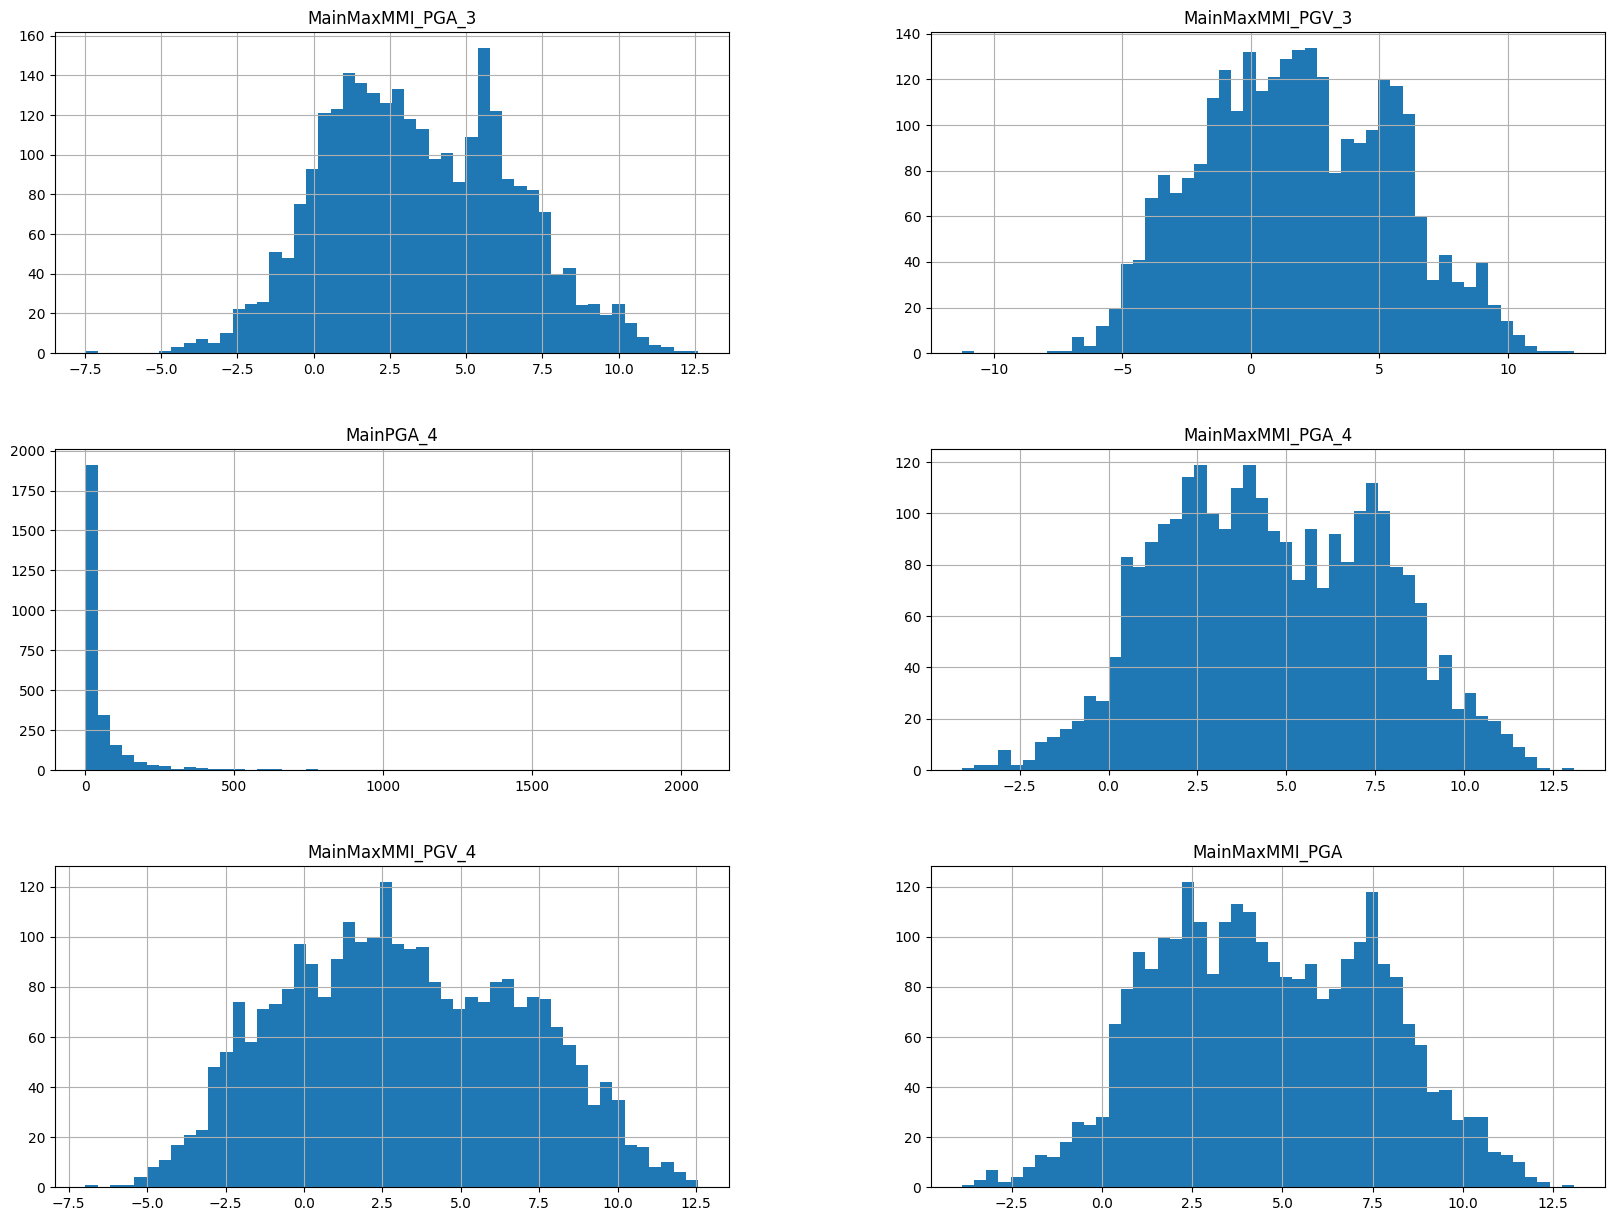

In [45]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

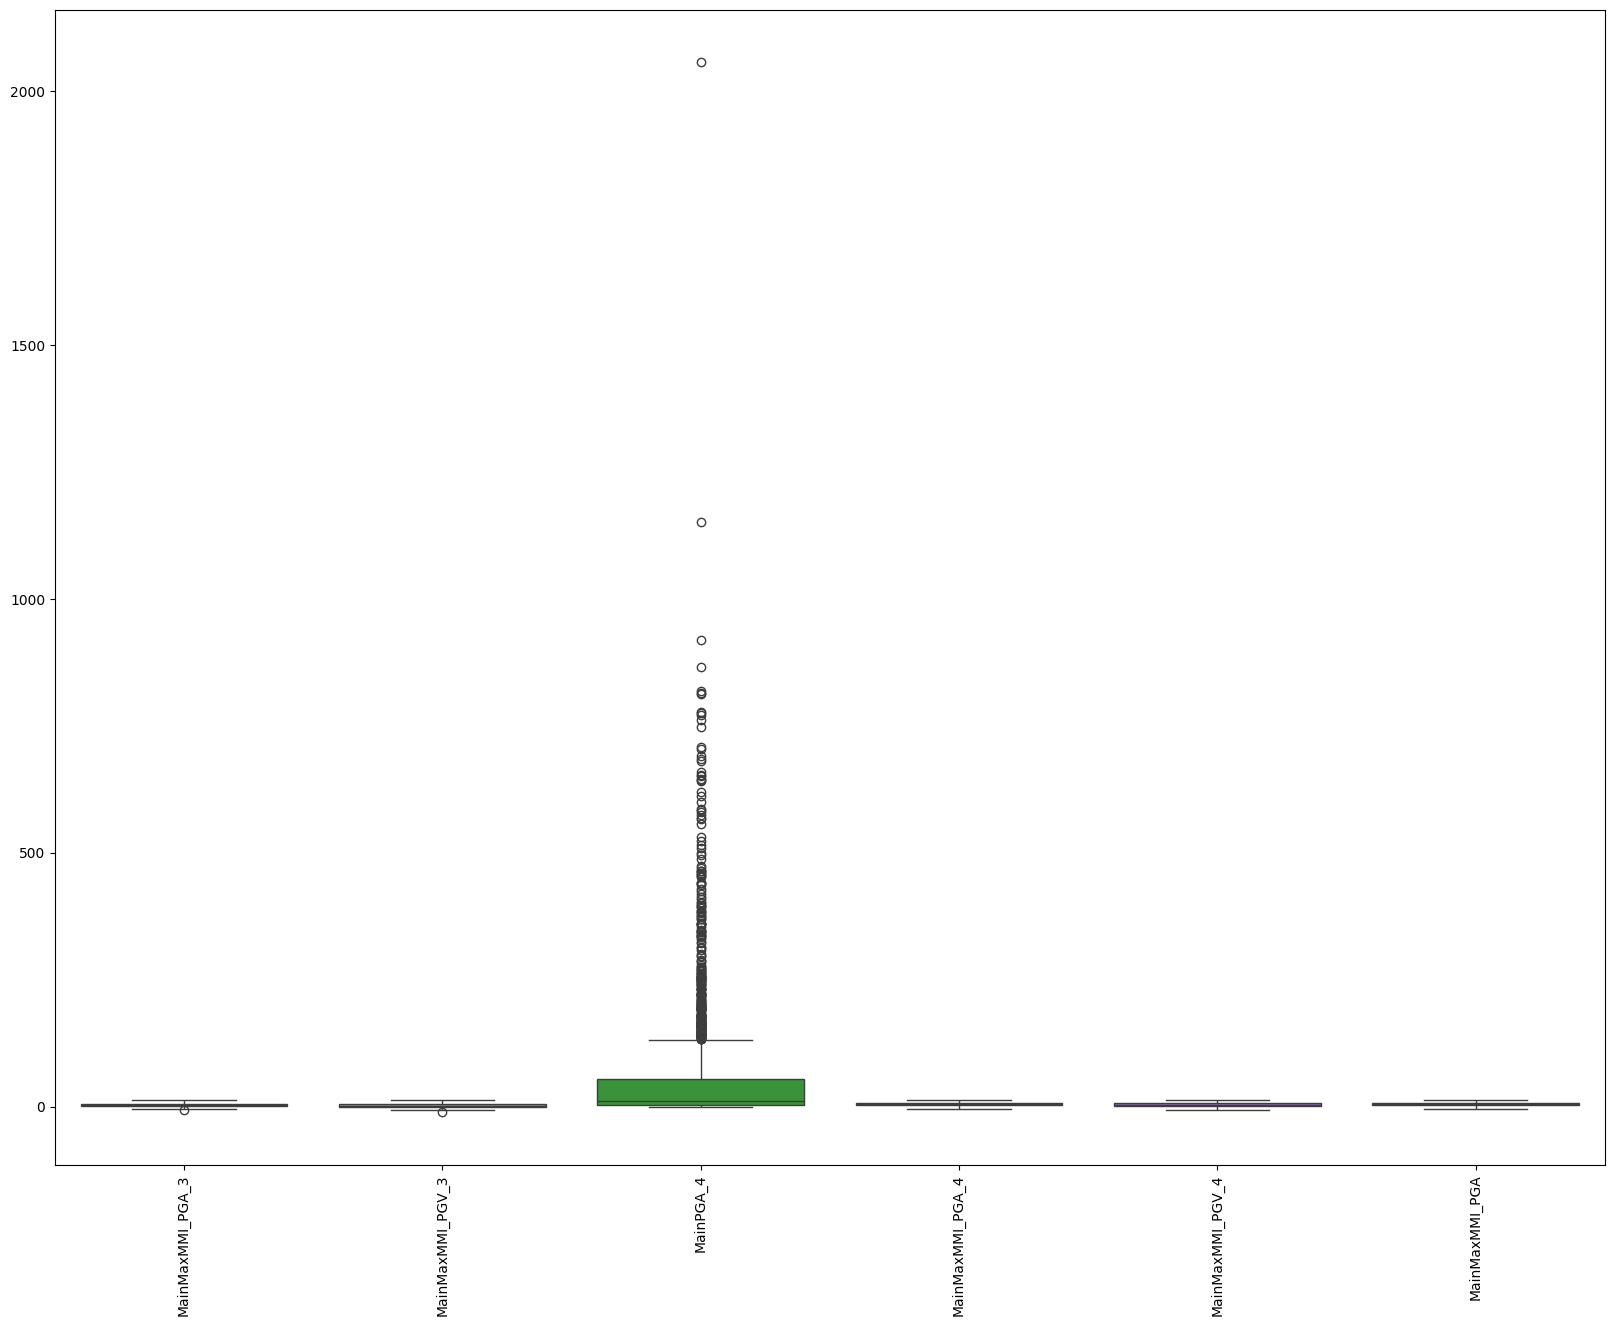

In [46]:
# Boxplots
plt.figure(figsize=(20, 15))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [47]:
# Outlier extraction using z-score
df['z_score'] = (df['MainPGA_4'] - df['MainPGA_4'].mean()) / df['MainPGA_4'].std()

df = df[df['z_score'].abs() < 3]

print(df)

      MainMaxMMI_PGA_3  MainMaxMMI_PGV_3  MainPGA_4  MainMaxMMI_PGA_4  \
0            -0.202868         -3.365183   1.840186          1.285030   
1             0.704579         -2.916836   3.592932          2.300883   
2             0.445814         -3.163189   2.327039          1.677264   
3             1.846211         -3.402378   4.153512          2.770056   
4             1.501048         -2.105058   3.949897          2.827954   
...                ...               ...        ...               ...   
2712         -1.184789         -2.014815   1.104653          0.470799   
2713          3.532088          1.242257  10.229048          4.083438   
2714          6.451707          5.462828  60.098377          7.253237   
2715          3.250233          3.701004  10.805873          4.324193   
2716          3.008309          0.127501   9.576506          4.200840   

      MainMaxMMI_PGV_4  MainMaxMMI_PGA   z_score  
0            -1.935929        1.285030 -0.452513  
1            -1.53857

In [48]:
# Defining x and y
X = df.drop('MainPGA_4', axis=1)
y = df['MainPGA_4']

# Train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0.5, 0, 'PGA (cm/s$^2$)')

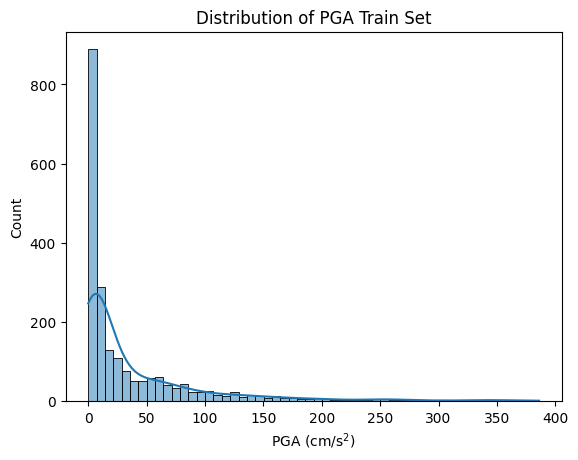

In [49]:
sns.histplot(y_train, kde=True)
plt.title('Distribution of PGA Train Set')
plt.xlabel('PGA (cm/s$^2$)')


# Models


In [50]:
param_grids = {
    "GradientBoosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'loss': ['linear', 'square']
    },
    "CatBoost": {
        'iterations': [100, 200],  
        'depth': [4, 6, 8],  
        'learning_rate': [0.01, 0.05], 
        'l2_leaf_reg': [3, 5], 
        'border_count': [32, 50],
        'bagging_temperature': [0.0, 0.5]  
    },
    "LightGBM": {
        'num_leaves': [15, 31],  
        'learning_rate': [0.05],  
        'n_estimators': [50], 
        'max_depth': [3, 5],  
        'min_child_samples': [50],
        'subsample': [0.8], 
        'colsample_bytree': [0.8],  
        'max_bin': [63],  
        'lambda_l1': [0],  
        'lambda_l2': [0]   
    },

    "RandomForest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
}

In [51]:
# Initialize models
models = {
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "LightGBM": LGBMRegressor(),
    "RandomForest": RandomForestRegressor()
}

# Grid search for each model
best_models = {}
results = []
for name, model in models.items():
    print(f"Running GridSearch for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], 
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    # Evaluate best model on test data
    y_test_pred = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    # Evaluate best model on train data
    y_train_pred = best_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    
    results.append({
        "Model": name,
        "Best Parameters": grid_search.best_params_,
        "Train R2": train_r2,
        "Test R2": test_r2,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train MAPE": train_mape,
        "Test MAPE": test_mape,
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to a CSV file
results_df.to_csv('model_results_with_train_test_comparison.csv', index=False)


Running GridSearch for GradientBoosting...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Running GridSearch for XGBoost...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.9}
Running GridSearch for AdaBoost...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for AdaBoost: {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 50}
Running GridSearch for CatBoost...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for CatBoost: {'bagging_temperature': 0.0, 'border_count': 50, 'depth': 8, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
Running GridSearch for LightGBM...
Fitting 5 folds for each o

# Results

In [52]:
results_df

,Model,Best Parameters,Train R2,Test R2,Train MSE,Test MSE,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MAPE,Test MAPE
0,GradientBoosting,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa...",1.000000,0.999973,0.001854,0.122619,0.043062,0.350170,0.031022,0.126721,0.527889,0.748905
1,XGBoost,"{'colsample_bytree': 1.0, 'learning_rate': 0.2...",0.999883,0.999190,0.445793,3.723353,0.667678,1.929599,0.267890,0.589071,2.698553,2.988904
2,AdaBoost,"{'learning_rate': 0.1, 'loss': 'square', 'n_es...",0.995381,0.995758,17.670506,19.499748,4.203630,4.415852,3.554315,3.694569,141.257551,146.838373
3,CatBoost,"{'bagging_temperature': 0.0, 'border_count': 5...",0.996797,0.995668,12.254031,19.913184,3.500576,4.462419,1.595536,1.974475,11.850126,12.774244
4,LightGBM,"{'colsample_bytree': 0.8, 'lambda_l1': 0, 'lam...",0.972568,0.965647,104.957376,157.929373,10.244871,12.566995,4.008766,4.617786,97.022866,100.662528
5,RandomForest,"{'bootstrap': True, 'max_depth': 30, 'min_samp...",0.999985,0.999959,0.058832,0.189210,0.242553,0.434983,0.058169,0.140675,0.130559,0.285309


In [53]:
results_df = results_df.round(4)
results_df.to_csv("Results.csv")

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


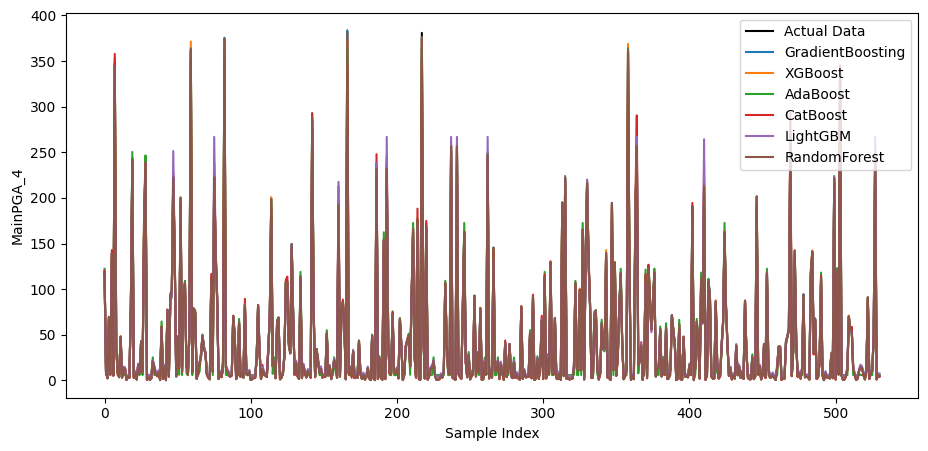

In [ ]:
fig, ax = plt.subplots(figsize=(11, 5))

sns.lineplot(x=range(len(y_test)), y=y_test, ax=ax, label='Actual Data', color='black')
for name in best_models.keys():
    sns.lineplot(x=range(len(y_test)), y=best_models[name].predict(X_test), ax=ax, label=name)

ax.set_xlabel('Sample Index')
ax.set_ylabel('PGA (cm/s$^2$)')
ax.legend()
plt.show()

In [55]:
# Tahmin edilen MainPGA değerlerini eklemek
X_test_with_predictions = X_test.copy()
for name, model in best_models.items():
    X_test_with_predictions[f'{name}_Predict'] = model.predict(X_test)

# Gerçek MainPGA değerlerini eklemek
X_test_with_predictions['MainPGA_4'] = y_test.values

# Sonuçları bir CSV dosyasına kaydetmek
X_test_with_predictions.to_csv('PredictionsandRealDataPGA.csv', index=False)

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


In [56]:
X_test_with_predictions[['MainPGA_4','GradientBoosting_Predict','XGBoost_Predict','AdaBoost_Predict','CatBoost_Predict','LightGBM_Predict','RandomForest_Predict']].head(20)

,MainPGA_4,GradientBoosting_Predict,XGBoost_Predict,AdaBoost_Predict,CatBoost_Predict,LightGBM_Predict,RandomForest_Predict
2520,118.346590,118.117154,115.068962,122.341519,120.139489,114.715730,118.233785
173,9.377236,9.345358,9.517994,5.750050,9.970517,11.326394,9.406528
1260,2.269989,2.255041,2.272153,5.750050,2.840528,4.989103,2.271839
2187,69.443837,69.454439,69.676338,68.096008,66.961431,64.880403,69.640006
1230,6.460732,6.398864,6.543936,5.750050,6.484998,8.827632,6.453978
2550,139.470485,139.500094,137.426422,133.464811,142.755415,129.825756,138.822516
373,5.392218,5.437258,5.404601,5.750050,5.011896,7.657458,5.401305
2181,347.453179,346.165541,341.715576,353.092838,357.813476,266.883471,344.095735
2390,36.619712,36.824737,36.579556,33.486139,37.493624,36.350798,36.710338
413,8.350296,8.442474,8.286048,5.750050,6.599404,10.512681,8.346232


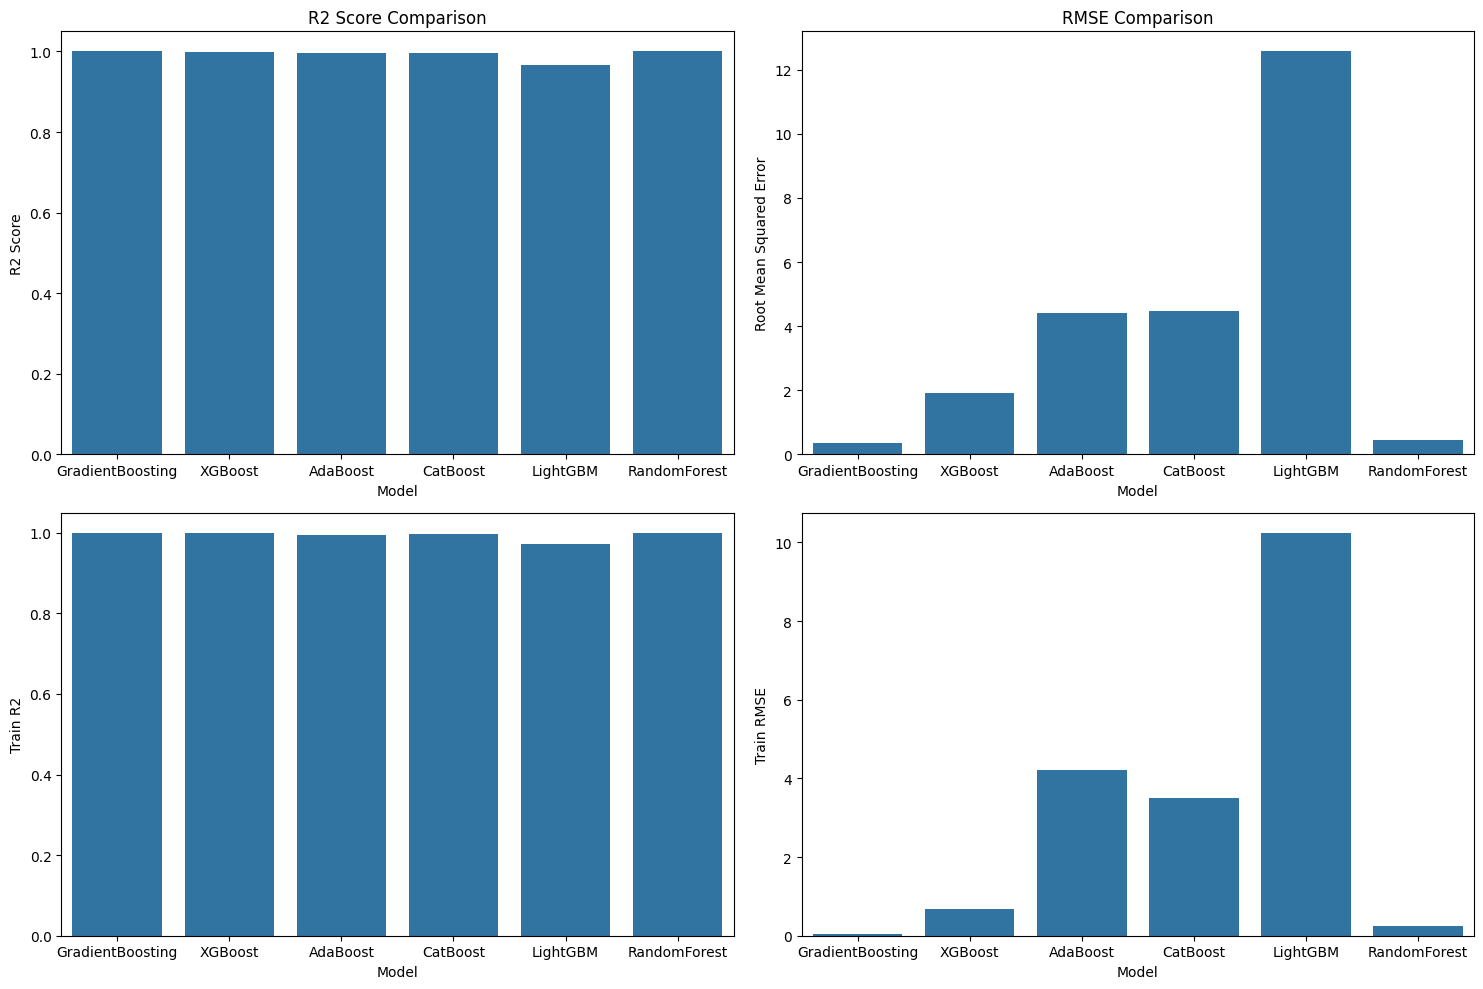

In [57]:
results_data = pd.read_csv('model_results_with_train_test_comparison.csv')

results_df = pd.DataFrame(results_data)

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x='Model', y='Test R2', data=results_df, ax=axes[0, 0])
axes[0, 0].set_title('R2 Score Comparison')
axes[0, 0].set_ylabel('Test R2 Score')

sns.barplot(x='Model', y='Test RMSE', data=results_df, ax=axes[0, 1])
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_ylabel('Test Root Mean Squared Error')


sns.barplot(x='Model', y='Train R2', data=results_df, ax=axes[1, 0])
axes[0, 0].set_title('R2 Score Comparison')
axes[0, 0].set_ylabel('R2 Score')

sns.barplot(x='Model', y='Train RMSE', data=results_df, ax=axes[1, 1])
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_ylabel('Root Mean Squared Error')


plt.tight_layout()
plt.show()